In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]


df = pd.DataFrame(salary, columns = ['Salary'])
df

,Salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [3]:
#five point summary
np.quantile(salary, [0,0.25,0.5,0.75,1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [4]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


Text(0.5, 1.0, 'Salary Outliers via boxplot')

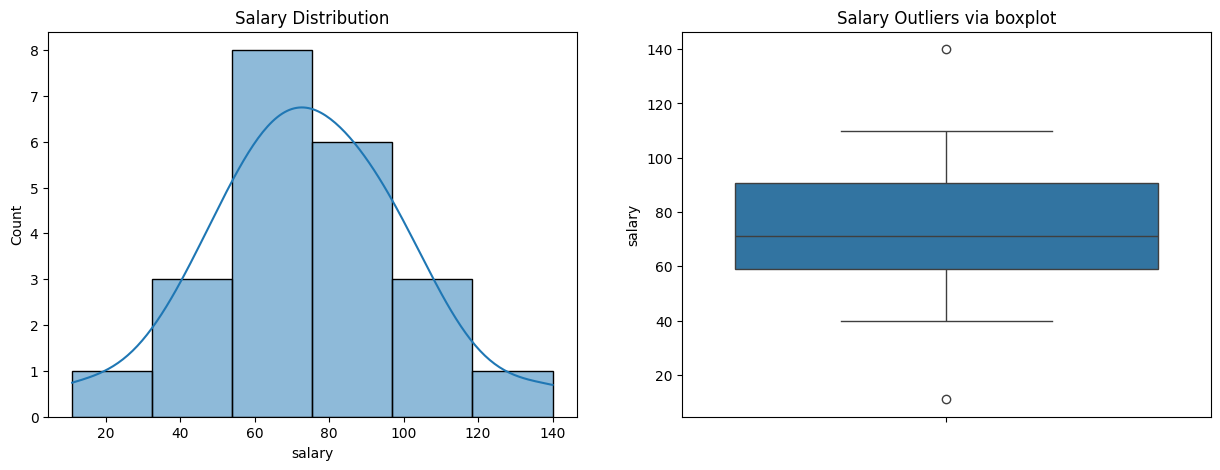

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel('salary')
plt.title('Salary Distribution')
sns.histplot(salary, kde=True)
plt.subplot(1,2,2)
sns.boxplot(salary)
plt.ylabel('salary')
plt.title('Salary Outliers via boxplot')

In [5]:
#dropping the outlier
#capping the outlier
#replace with mean and median
#Scaling and transformation

In [9]:
q1 = np.quantile(salary, 0.25)
q3 = np.quantile(salary, 0.75)
iqr = q3 - q1 
upper_fence = q3 + iqr*1.5
lower_fence = q1 - iqr*1.5 
new_df = df[(df['Salary']<= upper_fence) & (df['Salary']>= lower_fence)] 
new_df.shape

(20, 1)

Text(0.5, 1.0, 'Salary Outliers via boxplot')

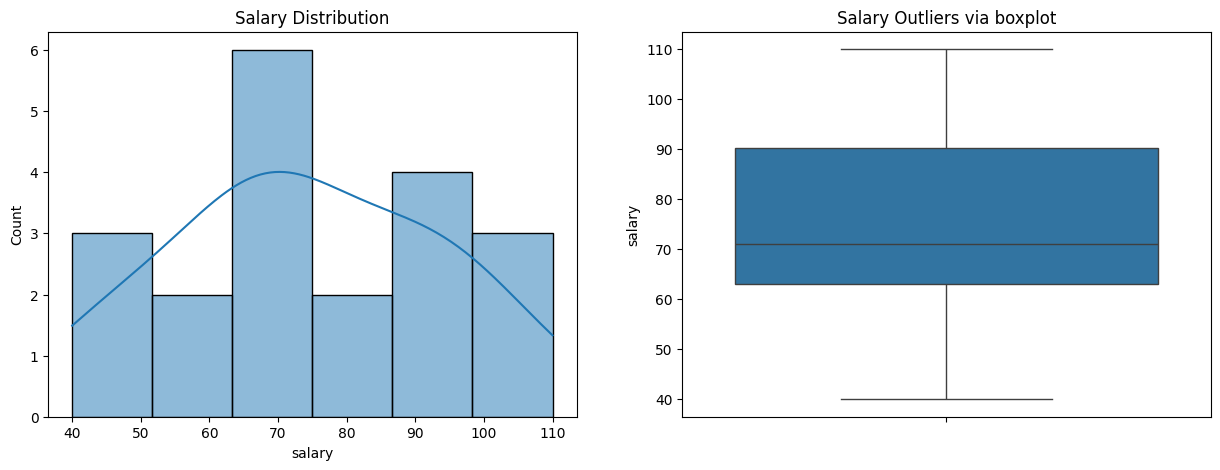

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel('salary')
plt.title('Salary Distribution')
sns.histplot(new_df['Salary'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(new_df['Salary'])
plt.ylabel('salary')
plt.title('Salary Outliers via boxplot')

## replace the outliers with mean and median

In [20]:
df['Salary_mean_imputed'] = np.where((df['Salary']> upper_fence) | (df['Salary']< lower_fence), df.Salary.mean(), df.Salary)

Text(0.5, 1.0, 'Salary Outliers via boxplot')

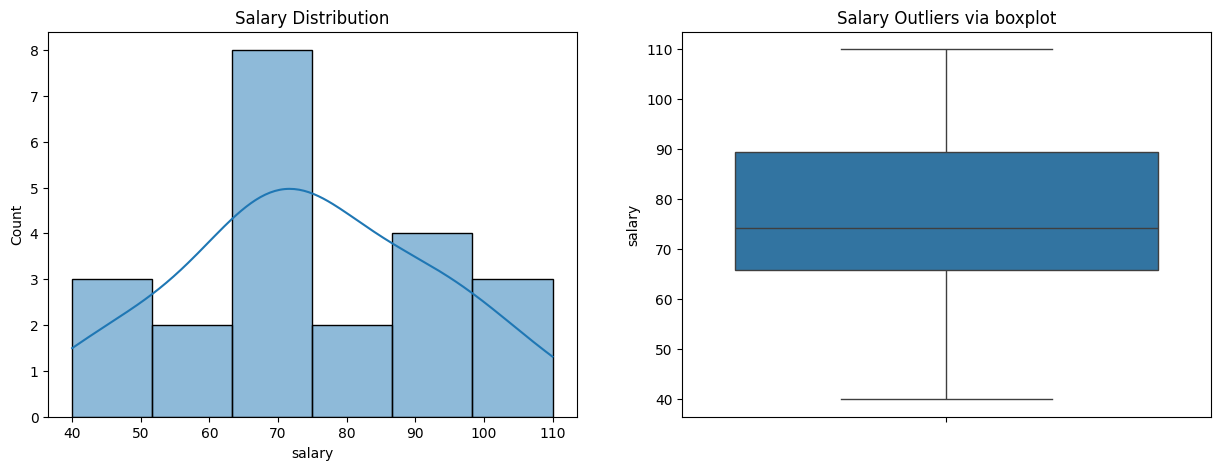

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel('salary')
plt.title('Salary Distribution')
sns.histplot(df['Salary_mean_imputed'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['Salary_mean_imputed'])
plt.ylabel('salary')
plt.title('Salary Outliers via boxplot')

## capping >> replacing outlier with the nearest values that is not outlier

In [25]:
df['Salary_capped'] = np.where((df['Salary']> upper_fence), upper_fence, np.where((df['Salary']< lower_fence), lower_fence, df.Salary))

Text(0.5, 1.0, 'Salary Outliers via boxplot')

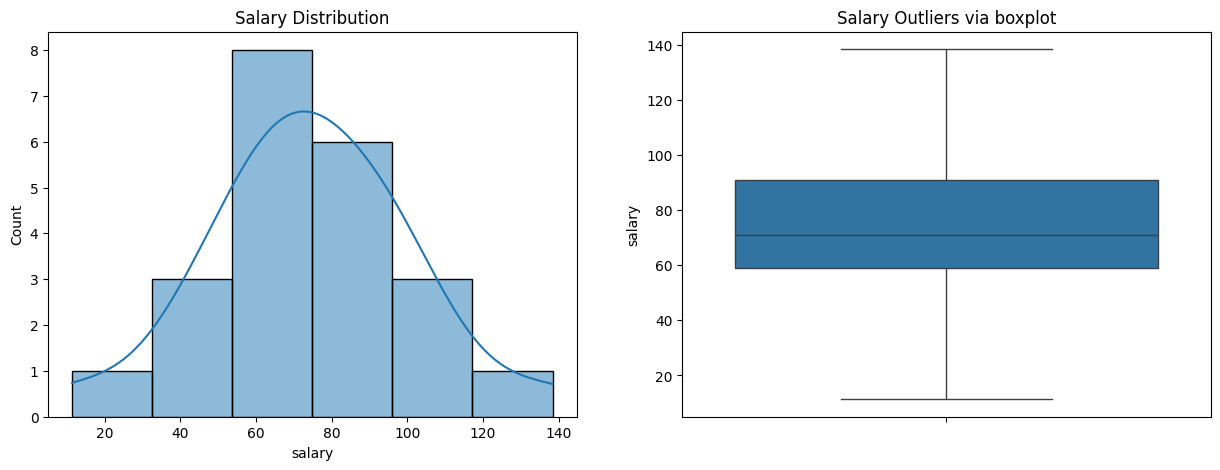

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel('salary')
plt.title('Salary Distribution')
sns.histplot(df['Salary_capped'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['Salary_capped'])
plt.ylabel('salary')
plt.title('Salary Outliers via boxplot')